# Libraries

In [1]:
# use

import os
import gzip
import shutil

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats.mstats import mquantiles

from tabulate import tabulate
from datetime import datetime
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

from sklearn import tree
from sklearn.model_selection import train_test_split
import pickle
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from math import exp

import gmaps
import googlemaps
import graphviz
import pydotplus
import geopandas # to read/write spatial data
# to display a few webpages within the notebook
from IPython.display import IFrame
import shapely
from shapely.geometry import Point, Polygon
from shapely import wkb
import geopy

In [2]:
# ! jupyter nbextension enable --py gmaps

# Data Source

In [3]:
# setting directory
path = "C:/Users/khyat/Documents/Yuvoh"
os.chdir(path)
!ls -l

total 3154
-rw-r--r-- 1 khyat 197609 3124181 Sep 26 15:50 Airbnb.pptx
drwxr-xr-x 1 khyat 197609       0 Oct  1 13:05 Data
drwxr-xr-x 1 khyat 197609       0 Oct  1 12:22 Data_Original
drwxr-xr-x 1 khyat 197609       0 Oct  3 22:57 Data_Output
-rw-r--r-- 1 khyat 197609      25 Oct  3 22:59 README.md
drwxr-xr-x 1 khyat 197609       0 Oct  3 22:57 Scripts
drwxr-xr-x 1 khyat 197609       0 Oct  4 05:21 Visualization_Output
-rw-r--r-- 1 khyat 197609   87023 Oct  4 04:37 treeClassifier.txt
-rw-r--r-- 1 khyat 197609     165 Sep 26 13:19 ~$Airbnb.pptx


In [4]:
# unzip gz source file
with gzip.open('Data_Original\listings.csv.gz', 'rb') as f_in:
    with open('Data\listings.csv', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

In [5]:
df_input = pd.read_csv("Data\listings.csv")

In [6]:
pd.set_option('display.max_columns', None)
df_input.head(n = 2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,13913,https://www.airbnb.com/rooms/13913,20190710134553,2019-07-11,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,"Hello Everyone, I'm offering my lovely double ...",My bright double bedroom with a large window h...,business,Finsbury Park is a friendly melting pot commun...,For art lovers I can give guest my Tate Member...,The flat only a 10 minute walk to Finsbury Par...,Guest will have access to the self catering ki...,I like to have little chats with my guest over...,I'm an artist and have my artwork up on the wa...,NaN,NaN,https://a0.muscache.com/im/pictures/ffb507b7-9...,NaN,54730,https://www.airbnb.com/users/show/54730,Alina,2009-11-16,"London, England, United Kingdom",I am a Multi-Media Visual Artist and Creative ...,within a few hours,86%,NaN,f,https://a0.muscache.com/im/users/54730/profile...,https://a0.muscache.com/im/users/54730/profile...,LB of Islington,4.0,4.0,"['email', 'phone', 'facebook', 'reviews']",t,f,"Islington, Greater London, United Kingdom",LB of Islington,Islington,NaN,Islington,Greater London,N4 3,London,"Islington, United Kingdom",GB,United Kingdom,51.56802,-0.11121,t,Apartment,Private room,2,1.0,1.0,0.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,""Paid parking off ...",538.0,$65.00,$333.00,"$1,176.00",$100.00,$15.00,1,$15.00,1,29,1,1,29,29,1.0,29.0,2 months ago,t,19,42,72,347,2019-07-11,16,2,2010-08-18,2019-06-10,96.0,9.0,10.0,9.0,10.0,9.0,9.0,f,NaN,NaN,f,f,moderate,f,f,3,1,2,0,0.15
1,15400,https://www.airbnb.com/rooms/15400,20190710134553,2019-07-11,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,Bright Chelsea Apartment This is a bright one...,Lots of windows and light. St Luke's Gardens ...,romantic,It is Chelsea.,The building next door is in the process of be...,The underground stations are South Kensington ...,There are two wardrobes for guests exclusive u...,If I am in the country I like to welcome my gu...,NO SMOKING PLEASE.. No unauthorised guests. No...,NaN,NaN,https://a0.muscache.com/im/pictures/428392/462...,NaN,60302,https://www.airbnb.com/users/show/60302,Philippa,2009-12-05,"Kensington, England, United Kingdom","English, grandmother, I have travelled quite ...",within a day,100%,NaN,t,https://a0.muscache.com/i

In [7]:
df = df_input

In [8]:
df.shape

(83850, 106)

In [9]:
list(df)

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',


In [10]:
df.describe()

,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,8.385000e+04,8.385000e+04,0.0,0.0,0.0,8.385000e+04,0.0,83803.000000,83803.000000,0.0,83850.000000,83850.000000,83850.00000,83712.000000,83816.000000,83710.000000,445.000000,83850.000000,83850.000000,8.385000e+04,83850.000000,83850.000000,8.385000e+04,8.385000e+04,83850.000000,8.385000e+04,83850.000000,83850.000000,83850.000000,83850.000000,83850.000000,83850.000000,61161.000000,61110.000000,61121.000000,61057.000000,61113.000000,61058.000000,61058.000000,83850.000000,83850.000000,83850.000000,83850.000000,62827.000000
mean,2.134820e+07,2.019071e+13,NaN,NaN,NaN,7.822874e+07,NaN,31.875279,31.875279,NaN,51.509496,-0.128389,3.18638,1.297341,1.414623,1.749433,669.640449,1.609112,4.201956,1.419899e+04,4.046058,6.767525,1.418358e+04,1.419559e+04,5.400020,1.419155e+04,7.521407,18.786213,30.977829,116.327835,16.484317,6.678998,92.743268,9.519048,9.286170,9.633490,9.664883,9.524616,9.284156,25.599499,23.574597,1.963435,0.061467,1.208366
std,1.028356e+07,1.988684e+01,NaN,NaN,NaN,7.823495e+07,NaN,172.809247,172.809247,NaN,0.046238,0.092231,2.01257,0.618016,0.926037,1.284223,916.791711,1.347548,16.070438,3.471113e+06,15.431566,21.669380,3.471113e+06,3.471113e+06,17.664505,3.471113e+06,9.812183,20.869159,32.444176,132.403346,34.892659,12.631549,9.957200,0.973384,1.121581,0.892901,0.878676,0.826909,1.024839,137.240553,136.912006,7.164130,0.863767,1.416845
min,1.391300e+04,2.019071e+13,NaN,NaN,NaN,2.010000e+03,NaN,0.000000,0.000000,NaN,51.292720,-0.501300,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.364932e+07,2.019071e+13,NaN,NaN,NaN,1.451736e+07,NaN,1.000000,1.000000,NaN,51.485240,-0.188390,2.00000,1.000000,1.000000,1.000000,130.000000,1.000000,1.000000,3.100000e+01,1.000000,1.000000,3.000000e+01,3.100000e+01,1.000000,3.100000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,90.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.240000
50%,2.200927e+07,2.019071e+13,NaN,NaN,NaN,4.451248e+07,NaN,2.000000,2.000000,NaN,51.513970,-0.125810,2.00000,1.000000,1.000000,1.000000,527.000000,1.000000,2.000000,1.125000e+03,2.000000,2.000000,1.125000e+03,1.125000e+03,2.000000,1.125000e+03,2.000000,10.000000,20.000000,55.000000,4.000000,1.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.000000,1.000000,0.000000,0.740000
75%,3.031554e+07,2.019071e+13,NaN,NaN,NaN,1.325813e+08,NaN,5.000000,5.000000,NaN,51.537400,-0.070370,4.00000,1.500000,2.000000,2.000000,900.000000,2.000000,3.000000,1.125000e+03,3.000000,4.000000,1.125000e+03,1.125000e+03,4.000000,1.125000e+03,13.000000,36.000000,60.000000,229.000000,17.000000,8.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000,2.000000,1.000000,0.000000,1.640000
max,3.658582e+07,2.019071e+13,NaN,NaN,NaN,2.749791e+08,NaN,1433.000000,1433.000000,NaN,51.686570,0.296570,16.00000,24.000

# Data Wrangling, Feature Engineering

Remove $ sign from the price columns

In [11]:
df[['price','weekly_price','monthly_price','security_deposit','cleaning_fee','extra_people']].head()

,price,weekly_price,monthly_price,security_deposit,cleaning_fee,extra_people
0,$65.00,$333.00,"$1,176.00",$100.00,$15.00,$15.00
1,$100.00,$600.00,"$2,250.00",$150.00,$50.00,$0.00
2,$300.00,"$1,378.00",NaN,$350.00,$65.00,$10.00
3,$175.00,"$1,050.00","$3,500.00",$250.00,$70.00,$0.00
4,$65.00,$630.00,"$2,515.00",$250.00,$50.00,$11.00


In [12]:
df[['price','weekly_price','monthly_price','security_deposit','cleaning_fee','extra_people']] = df[['price','weekly_price','monthly_price','security_deposit','cleaning_fee','extra_people']].replace('[\$,]', '', regex=True).astype(float)

In [13]:
df[['price','weekly_price','monthly_price','security_deposit','cleaning_fee','extra_people']].head()

,price,weekly_price,monthly_price,security_deposit,cleaning_fee,extra_people
0,65.0,333.0,1176.0,100.0,15.0,15.0
1,100.0,600.0,2250.0,150.0,50.0,0.0
2,300.0,1378.0,NaN,350.0,65.0,10.0
3,175.0,1050.0,3500.0,250.0,70.0,0.0
4,65.0,630.0,2515.0,250.0,50.0,11.0


We remove the outliers using the quantiles (less than 2.5% and greater than 97.5%)

In [14]:
lr = df.price.quantile(0.025)
ur = df.price.quantile(0.975)
df = df[df.price.gt(lr) & df.price.lt(ur)]

In [15]:
# mquantiles(df['price'])
df['price_group'] = pd.qcut(df.price, 3, labels=["low", "medium", "high"])
df[['price_group','price']].head(n=10)

,price_group,price
0,medium,65.0
1,medium,100.0
2,high,300.0
3,high,175.0
4,medium,65.0
5,low,29.0
6,high,147.0
7,high,147.0
8,low,34.0
9,medium,100.0


Dropping columns with more than 25000 null values.

In [16]:
t = df.isnull().sum()
t.to_csv("Data_Output/NullValues.csv", sep=',')

In [17]:
#, 'host_response_time', 'host_response_rate', 'review_scores_checkin', 'review_scores_location', 'review_scores_value', 'review_scores_accuracy', 'review_scores_communication', 'review_scores_cleanliness', 'review_scores_rating', 'cleaning_fee', 'first_review', 'last_review', 'reviews_per_month', 'host_neighbourhood', 'state', 'summary', 'zipcode', 'description'
t = ['thumbnail_url', 'medium_url', 'xl_picture_url', 'host_acceptance_rate', 'neighbourhood_group_cleansed', 'jurisdiction_names', 'license', 'square_feet', 'monthly_price', 'weekly_price', 'notes', 'access', 'host_about', 'interaction', 'house_rules', 'transit', 'neighborhood_overview', 'security_deposit', 'space']
df.drop(t, axis=1, inplace=True)
df.shape

(79454, 88)

Dropping unwanted columns

In [18]:
t = ['listing_url' , 'picture_url', 'host_url', 'host_thumbnail_url', 'host_picture_url', 'scrape_id', 'last_scraped', 'is_location_exact', 'calendar_last_scraped', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights','maximum_maximum_nights', 'minimum_nights_avg_ntm','maximum_nights_avg_ntm', 'calendar_updated','requires_license']
df.drop(t, axis=1, inplace=True)
df.shape

(79454, 71)

Changing column type

In [19]:
t = ['accommodates','bathrooms', 'bedrooms', 'beds', 'guests_included', 'extra_people','availability_365', 'review_scores_rating', 
            'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'host_listings_count', 'number_of_reviews']
for i in t:
    df[i] = df[i].astype(float)

Remove data rows that doesn't make much sense

In [20]:
df = df.loc[df['minimum_nights'] < 999]
df = df.loc[df['bedrooms'] != 0]
df = df.loc[df['bathrooms'] != 0]
df = df.loc[df['price'] != 0]
df = df.loc[df['beds'] != 0]

Filling missing values

In [21]:
df['cleaning_fee'].fillna(0, inplace=True)

Encoding Categorical Column like Room Type, host_response_time

In [22]:
df["room_type_num"] = pd.factorize(df.room_type)[0]

In [23]:
df.groupby(['room_type', 'room_type_num']).size().reset_index(name='Freq')

,room_type,room_type_num,Freq
0,Entire home/apt,0,40667
1,Private room,1,31696
2,Shared room,2,416


In [24]:
for column in ['host_is_superhost','host_has_profile_pic']:
    df[column] = df[column].map({'f':0,'t':1})

Encoding Other Categorical Features

In [25]:
def encode_categorical(array):
    if not array.dtype == np.dtype('float64'):
        return preprocessing.LabelEncoder().fit_transform(array) 
    else:
        return array
    
# Creating a copy of the dataframe
df_cat_encoded = df.copy()
df_cat_encoded = df_cat_encoded.dropna(axis=0) # delete NA
# Encode categorical data
df_cat_encoded = df_cat_encoded.apply(encode_categorical)

# df_cat_encoded = df_cat_encoded.iloc[:, :-1]
# pd.set_option('display.max_columns', None)
# df_cat_encoded.head(n = 2)

In [26]:
# Compute matrix of correlation coefficients
corr_matrix = np.corrcoef(df_cat_encoded.T)
# print(corr_matrix)
corr_df = pd.DataFrame(data = corr_matrix, columns = df_cat_encoded.columns, index = df_cat_encoded.columns)
print(corr_df)

                                                    id      name   summary  \
id                                            1.000000  0.014634 -0.004714   
name                                          0.014634  1.000000  0.054027   
summary                                      -0.004714  0.054027  1.000000   
description                                  -0.004469  0.054168  0.999557   
experiences_offered                           0.045731 -0.006763  0.012284   
host_id                                       0.373105  0.005258  0.020387   
host_name                                     0.016577  0.020187  0.014098   
host_since                                    0.374938  0.003084  0.017431   
host_location                                -0.140500 -0.005227 -0.015062   
host_response_time                            0.126442  0.009790  0.018579   
host_response_rate                            0.003637 -0.011375  0.033489   
host_is_superhost                            -0.124417  0.011252

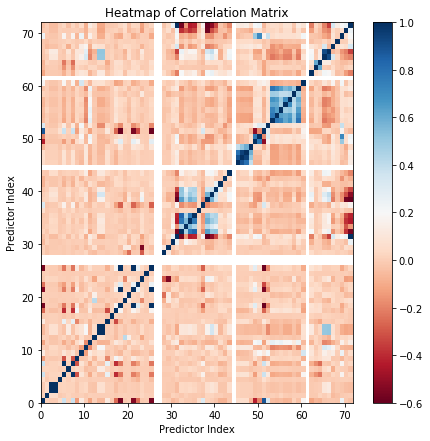

In [27]:
# Display heat map, blue zones show use features that have high correlation, just gives us an idea of where
# to look in the data frame
plt.figure(figsize=(7, 7))
plt.pcolor(corr_matrix, cmap='RdBu')
plt.xlabel('Predictor Index')
plt.ylabel('Predictor Index')
plt.title('Heatmap of Correlation Matrix')
plt.colorbar()

plt.show()

In [28]:
# Look up correlations manually
# pd.options.display.max_columns = 40
# pd.options.display.max_rows = 40
# pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
corr_df['price']

id                                              0.014998
name                                            0.020663
summary                                         0.058773
description                                     0.058799
experiences_offered                            -0.011318
host_id                                        -0.023836
host_name                                       0.015816
host_since                                     -0.028090
host_location                                   0.013084
host_response_time                             -0.006914
host_response_rate                              0.115642
host_is_superhost                              -0.076303
host_neighbourhood                             -0.036110
host_listings_count                             0.165880
host_total_listings_count                       0.165880
host_verifications                              0.012613
host_has_profile_pic                            0.004537
host_identity_verified         

In [29]:
# Removing similar (duplicate) features
# t = ["calculated_host_listings_count_private_rooms", "calculated_host_listings_count_shared_rooms", "availability_30", "availability_60", "availability_90", "require_guest_profile_picture"]
# df_cat_encoded_cleaned = df_cat_encoded.drop(t, axis=1)